<a href="https://colab.research.google.com/github/abiflynn/supervised_machine_learning/blob/main/housing_prices_classification/1_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 7: Housing Prices
* Iteration 0, An Intuition-Based Model
* Iteration 1, Train a Decision Tree
* Piplines Creation
* Iteration 2, Grid Search - to find the best parameters of the model
* Iteration 2, Grid Search - to find the best parameters of the pipeline

# Read the Data / Import Packages 

In [1]:
import pandas as pd

path = '/content/drive/MyDrive/WBS CODING/Projects/Project 7: (Supervised Machine Learning)/housing-classification-iter-0-2.csv'

housing_df = pd.read_csv(path)
housing_df .sample(10)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
1114,5400,90.0,833,2,0,0,1,0,0,0
492,15578,105.0,728,3,0,0,2,0,0,0
584,6120,51.0,884,3,0,0,1,0,120,0
783,9101,NaN,1097,1,1,0,2,303,0,0
1186,10615,107.0,978,3,0,0,2,0,0,0
343,8849,63.0,1684,2,1,0,2,495,0,1
582,11841,81.0,816,3,0,0,0,0,0,0
722,8120,70.0,864,3,0,0,2,0,0,0
52,8472,110.0,816,2,0,0,2,106,0,0
410,9571,68.0,1276,3,0,0,1,0,0,0


The Data 
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* TotalBsmtSF: Total square feet of basement area
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* Fireplaces: Number of fireplaces
* PoolArea: Pool area in square feet
* GarageCars: Size of garage in car capacity
* WoodDeckSF: Wood deck area in square feet
* ScreenPorch: Screen porch area in square feet

# Creating Target Feature (Y)

The information you want to predict 

In [2]:
y = housing_df.pop("Expensive")

In [3]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

# Creating Predictor Features (X)
The columns you use to make the predictions 

In [4]:
x = housing_df
x.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [6]:
x.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

# Train-Test Split
Using the train_test_split function to split the data into; 

*  Training Data: The data the model "sees" (70% - 85%)
*  Testing Data: Te remaingin data the data doesn't see and is used to test (15% -30%)



In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [8]:
x_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,9900,90.0,1347,4,1,0,3,340,0
580,14585,NaN,1144,3,2,0,2,216,0
961,12227,NaN,1330,4,1,0,2,550,0
78,10778,72.0,1768,4,0,0,0,0,0
5,14115,85.0,796,1,0,0,2,40,0


In [9]:
y_train.head()

318    1
580    0
961    1
78     0
5      0
Name: Expensive, dtype: int64

In [10]:
x_test.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
147,9505,NaN,884,3,1,0,2,144,0
676,9600,60.0,1095,4,0,0,3,0,0
1304,3363,32.0,976,3,0,0,2,0,0
1372,9750,75.0,1108,3,1,0,2,253,0
1427,10930,60.0,913,3,1,0,1,0,0


In [11]:
y_test.head()

147     0
676     0
1304    0
1372    1
1427    0
Name: Expensive, dtype: int64

# Iteration 0 - An Intuition-Based Model


Machine Learning models should never be the first option to solve any problem. Machine Learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company has build following simple rules, common sense or gained expertise.

Therefore, the first step when solving any problem should be to create a simple working solution and get the accuarcy which can be used to compare against. 

### This prediction assumes that all houses are not expensive. 

In [12]:
#Count the values expensive or not 
y_train.value_counts()

0    993
1    175
Name: Expensive, dtype: int64

In [13]:
#Length of the dataset
len(y_train)

1168

In [14]:
#Predicting model stating that all houses are not expansive (0) for the training data 
pred_pessimistic_train = pd.Series(0, index=range(len(x_train)))

In [15]:
#Accuracy of the training data 
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )

train_accuracy_rounded = round(train_accuracy, 2)

print("The training data prediction is {:.0%} accurate".format(train_accuracy_rounded))

The training data prediction is 85% accurate


In [16]:
#Predicting model stating that all houses are not expansive (0) for the test data 
pred_pessimistic_test = pd.Series(0, index=range(len(x_test)))

In [17]:
#Accuracy of the test data 
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pessimistic_test
                               )

test_accuracy_rounded = round(test_accuracy, 2)

print("The test data prediction is {:.0%} accurate".format(test_accuracy_rounded))

The test data prediction is 86% accurate


### This prediction assumes that all houses with a pool area are expensive.

In [18]:
# Create a new Series to store the predictions
pred_pool_train = pd.Series(0, index=range(len(x_train)))

# Set the prediction to houses are expensive if the pool areas is greater than 1 
pred_pool_train[x_train["PoolArea"].values >= 1] = 1

In [19]:
#Accuracy of the training data 
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pool_train
                                 )

train_accuracy_rounded = round(train_accuracy, 2)

print("The training data prediction is {:.0%} accurate".format(train_accuracy_rounded))

The training data prediction is 85% accurate


In [20]:
# Create a new Series to store the predictions
pred_pool_test = pd.Series(0, index=range(len(x_test)))

# Set the prediction to houses are expensive if the pool areas is greater than 1 
pred_pool_test[x_test["PoolArea"].values >= 1] = 1

In [21]:
#Accuracy of the training data 
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true = y_test,
                                 y_pred = pred_pool_test
                                 )

test_accuracy_rounded = round(test_accuracy, 2)

print("The test data prediction is {:.0%} accurate".format(test_accuracy_rounded))

The test data prediction is 86% accurate


### This prediction assumes that all houses with a garage that fits more than 2 car are expensive.

In [22]:
# Create a new Series to store the predictions
pred_garage_train = pd.Series(0, index=range(len(x_train)))

# Set the prediction to houses are expensive if the garage fits more than 2 cars  
pred_garage_train[x_train["GarageCars"].values > 2] = 1

In [23]:
#Accuracy of the training data 
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_garage_train
                                 )

train_accuracy_rounded = round(train_accuracy, 2)

print("The training data prediction is {:.0%} accurate".format(train_accuracy_rounded))

The training data prediction is 90% accurate


In [24]:
# Create a new Series to store the predictions
pred_garage_test = pd.Series(0, index=range(len(x_test)))

# Set the prediction to houses are expensive if the garage fits more than 2 cars 
pred_garage_test[x_test["GarageCars"].values > 2] = 1

In [25]:
#Accuracy of the training data 
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true = y_test,
                                 y_pred = pred_garage_test
                                 )

test_accuracy_rounded = round(test_accuracy, 2)

print("The test data prediction is {:.0%} accurate".format(test_accuracy_rounded))

The test data prediction is 90% accurate


# Upgrade Scikit-Learn

In [26]:
# this needs to be run for each new runtime
# because colab has scikit-learn 1.0.2 pre-installed 
# and we need newer version (1.2.0 and higher)
# to use .set_output() method

#!pip install scikit-learn --upgrade
!pip install scikit-learn==1.2.0

# if you plan on running the whole notebook again during the same runtime
# you can comment the line above

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Iteration 1, Train a Decision Tree

### Create Dataset with only Numerical Data 

In [27]:
#Select only numerical features (Decision tree does not work with categorical features)
x_num = x.select_dtypes(include="number")

In [28]:
#Since created a new dataframe without the categorical features, we need to create our test and train sets again.
x_num_train, x_num_test, y_train, y_test = train_test_split(x_num, y, test_size=0.2, random_state=123)

### Remove Null /NaN Values (Replace with the Mean)


Simple imputer allows these strategies:
* mean (default)
* median
* most frequent
* constant

Follow this approach for different types of estimators:
1.   Initialize  (Mean default or set different parameter)
2.   Use fit on the train set  (Fit the train data to get the mean)
3.   Use transform on the train set (Transform the train data so the null values are replaces with the mean)
4.   Use transform on the test set (Transform the test data so the null values are replaces with the mean of the train data)

In [29]:
#Remove NaN / Null Values (Decision tree does not work with NaN / Null values)
#Use the SimpleImputer with its default values. It will replace any missing value with the mean of the column it belongs to.

from sklearn.impute import SimpleImputer

In [30]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [31]:
# 2. use fit on the train set
my_imputer.fit(x_num_train)

SimpleImputer()

In [32]:
# 3. use transform on the train set
x_num_imputed_train = my_imputer.transform(x_num_train)

In [33]:
x_num_imputed_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

In [34]:
# impute NaN's to test set
x_num_imputed_test = my_imputer.transform(x_num_test)

### Implement a Decision Tree

In [35]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(random_state = 123)

# 3. fit the model to the train data (X needs to be capital)
my_tree.fit(X = x_num_imputed_train,
            y = y_train)

DecisionTreeClassifier(random_state=123)

In [36]:
#Make predictions training data 
y_pred_tree_train = my_tree.predict(x_num_imputed_train)

In [37]:
#Check accuracy on the train set
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                y_pred = y_pred_tree_train
                                )

train_accuracy_rounded = round(train_accuracy, 2)

print("The training data prediction is {:.0%} accurate".format(train_accuracy_rounded))

The training data prediction is 100% accurate


In [38]:
#Make predictions test data 
y_pred_tree_test = my_tree.predict(x_num_imputed_test)

In [39]:
#Check accuracy on the test set
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = y_pred_tree_test
                               )

test_accuracy_rounded = round(test_accuracy, 2)

print("The test data prediction is {:.0%} accurate".format(test_accuracy_rounded))

The test data prediction is 88% accurate


### Plotting the Decision Tree

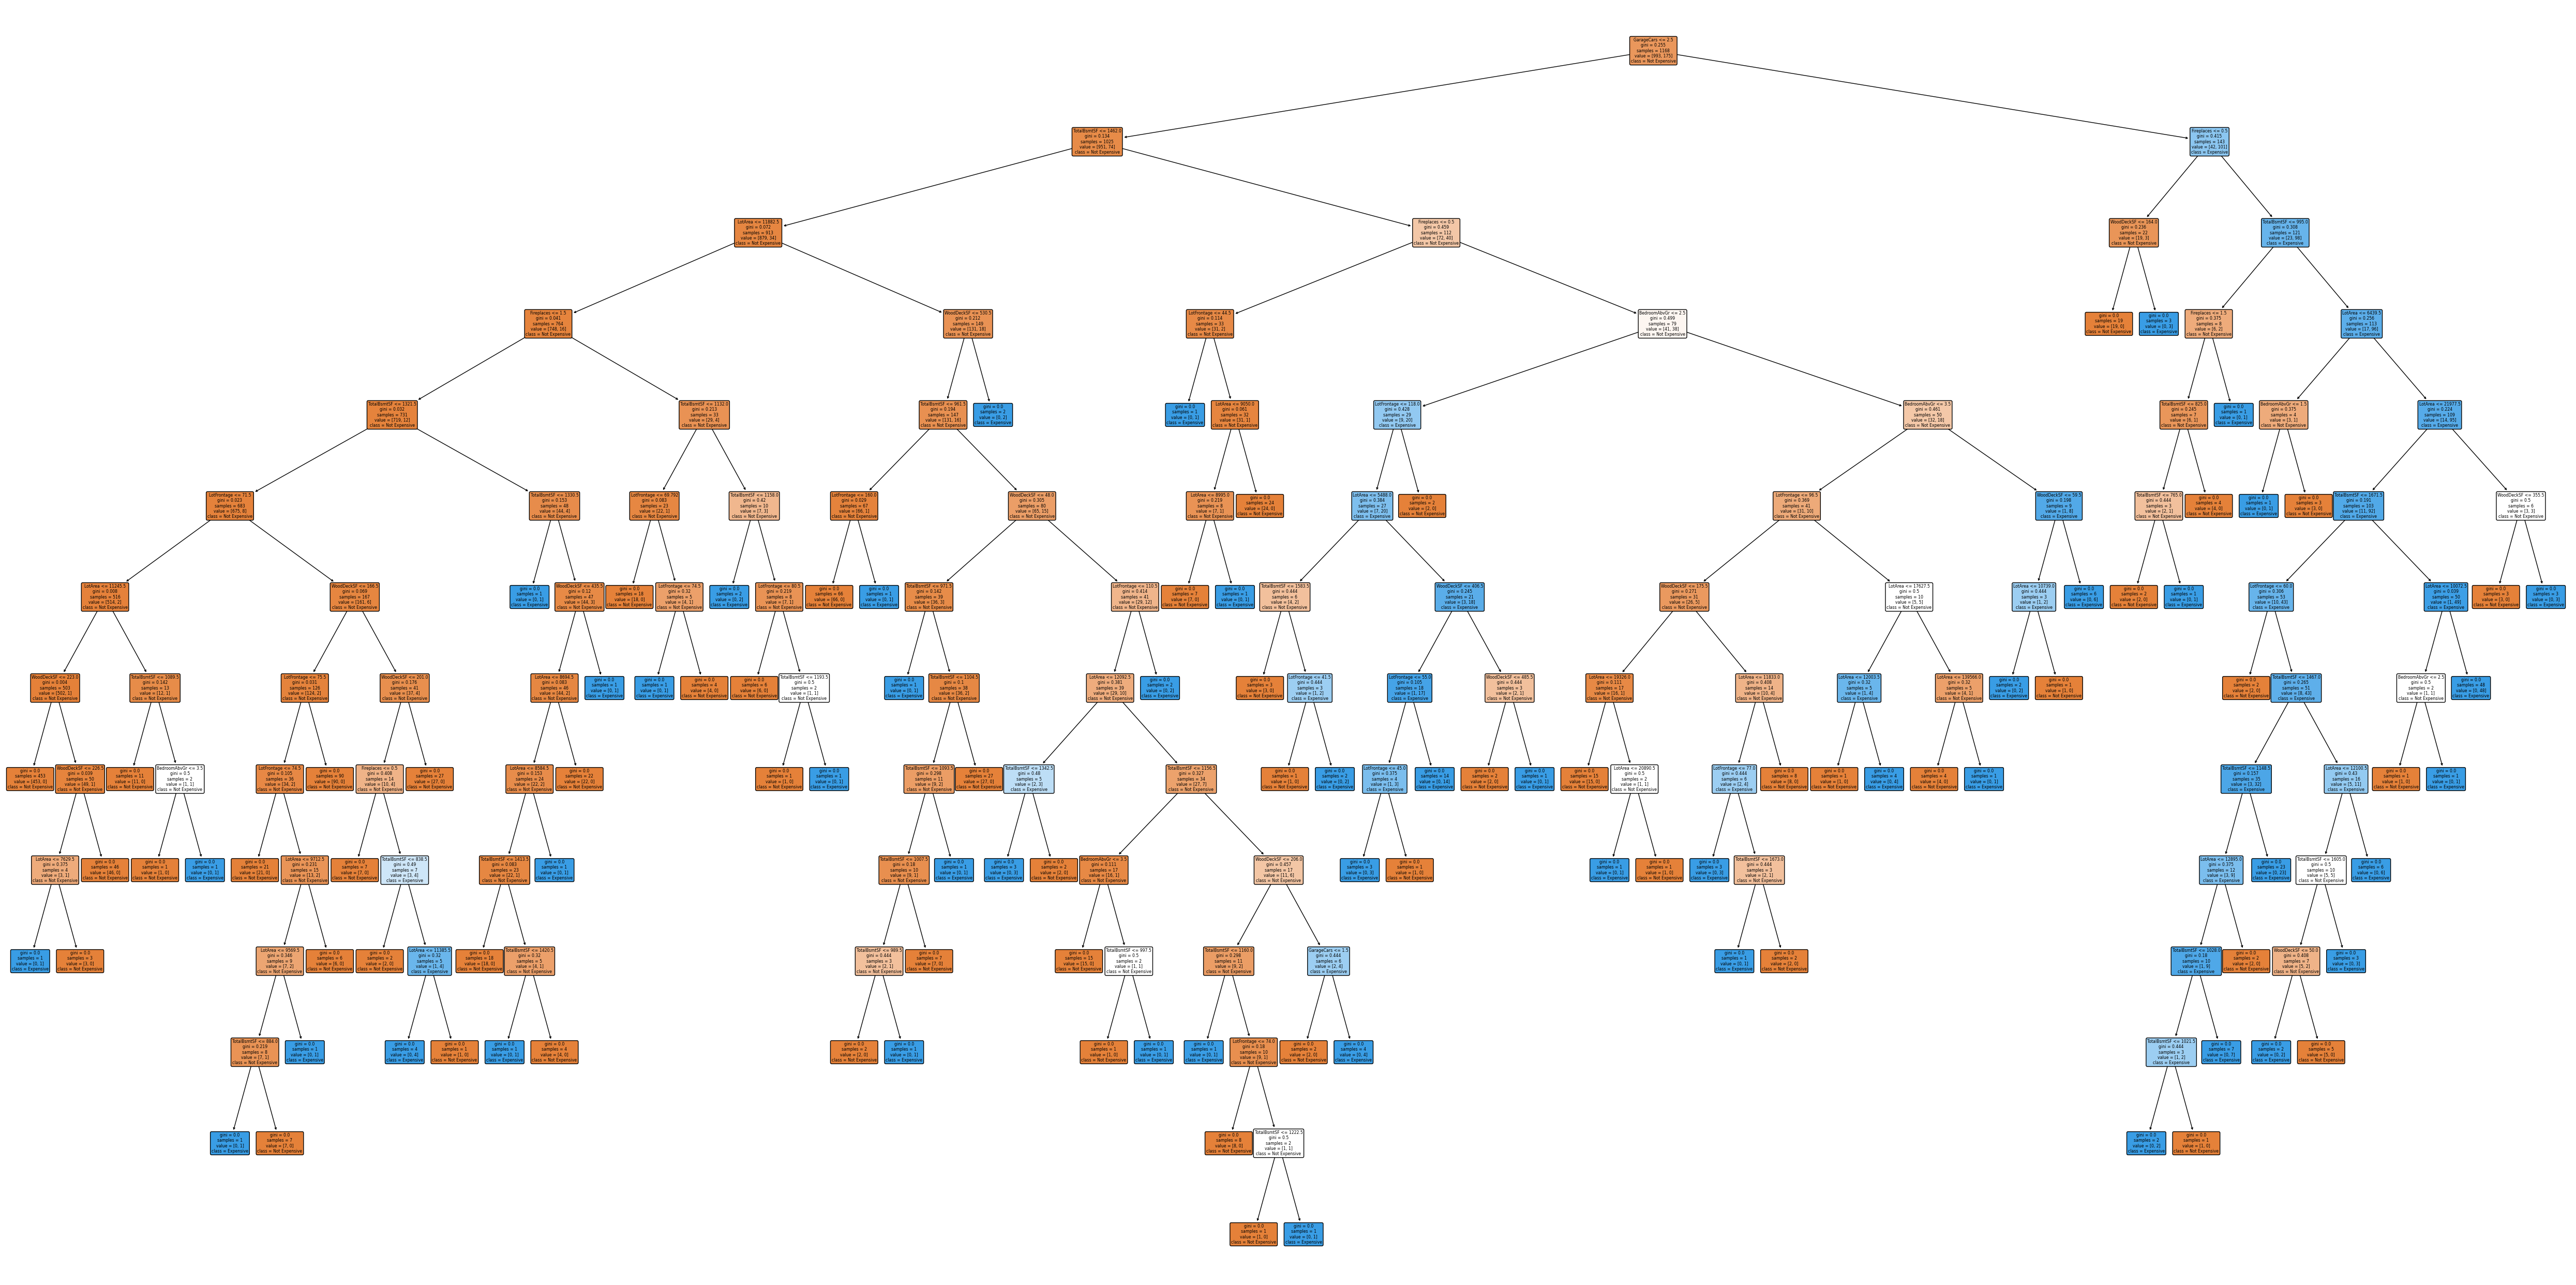

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=x_num.columns
     );

# Iteration 1, Train a Decision Tree (COPY)

### Implement a Decision Tree

In [41]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf= 10, random_state = 123)

# 3. fit the model to the train data (X needs to be capital)
my_tree.fit(X = x_num_imputed_train,
            y = y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=123)

In [42]:
#Make predictions training data 
y_pred_tree_train = my_tree.predict(x_num_imputed_train)

#Check accuracy on the train set
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                y_pred = y_pred_tree_train
                                )

train_accuracy_rounded = round(train_accuracy, 4)

print("The training data prediction is {:.2%} accurate".format(train_accuracy_rounded))

The training data prediction is 92.38% accurate


In [43]:
#Make predictions test data 
y_pred_tree_test = my_tree.predict(x_num_imputed_test)

#Check accuracy on the test set
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = y_pred_tree_test
                               )

test_accuracy_rounded = round(test_accuracy, 4)

print("The test data prediction is {:.2%} accurate".format(test_accuracy_rounded))

The test data prediction is 92.12% accurate


# Piplines Creation

Before moving forward in our quest to improve the model, take a moment to learn how to use Scikit-Learn Pipelines. They will not increase the performance of your model. However, they are a necessary tool to compress all the steps in the data preparation & modelling phases into a single one.

In [44]:
#Simple imputer and decision tree classifier already imported 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
#Import standard scaler if you want to include in the pipeline as well
from sklearn.preprocessing import StandardScaler
#Import make_pipeline
from sklearn.pipeline import make_pipeline

In [45]:
#Set your simple imputer
imputer = SimpleImputer(strategy="median")
#Set your decision tree classifier
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10)

In [46]:
#Create your pipeline 
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

In [47]:
#Fit the pipeline to the training data
pipe.fit(x_num_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10))])

In [48]:
#If you want pipe steps presented like text
from sklearn import set_config

set_config(display="text")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10))])

In [49]:
#To switch back to diagram
set_config(display="diagram")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10))])

In [50]:
#Use the pipeline to make predictions
pipe.predict(x_num_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

# Iteration 2, Grid Search - to find the best parameters of the model

So far, we tuned the hyperparameters of the decision tree manually. This is not ideal, for two reasons:

* It's not efficient in terms of quickly finding the best combination of parameters.
* If we keep checking the performance on the test set over and over again, we might end up creating a model that fits that particular test set, but does not generalize as well with new data. Test sets are meant to reamain unseen until the very last moment of ML development.

In [51]:
# Initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()

In [52]:
# Create a pipeline
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

In [53]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

To define the parameter grid for cross validation, you need to create a dictionary, where:

* The keys are the name of the pipeline step, followed by two underscores and the name of the parameter you want to tune.
* The values are lists (or "ranges") with all the values you want to try for each parameter.

In [54]:
#Create the parameter grid 
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }
#range(2,20,2) means start at 2 and go up in 2s until 20

When defining the cross validation, we want to pass our pipeline, our parameter grid and the number of folds (an arbitrary number, usually 5 or 10) through the grid search.

In [55]:
#Import gridsearchcv 
from sklearn.model_selection import GridSearchCV

In [56]:
#Define gridsearch cross validation
search = GridSearchCV(pipe, #your pipeline already defined
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process

In [57]:
# fit
search.fit(x_num_imputed_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=1)

In [58]:
#Explore the best parameters and the best score achieved with the cross validation:
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 33}

In [59]:
#The mean cross-validated score of the best estimator
search.best_score_

0.9255236418326547

In [60]:
# training accuracy
y_train_pred = search.predict(x_num_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

train_accuracy_rounded = round(train_accuracy, 4)

print("The training data prediction is {:.2%} accurate".format(train_accuracy_rounded))

The training data prediction is 93.92% accurate


In [61]:
# testing accuracy
y_test_pred = search.predict(x_num_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy_rounded = round(test_accuracy, 4)

print("The test data prediction is {:.2%} accurate".format(test_accuracy_rounded))

The test data prediction is 92.12% accurate


# Iteration 2, Grid Search - to find the best parameters of the pipeline

Add a scaler to the pipeline, and use GridSearchCV to tune the parameters of the scaler, as well as the parameters of the imputer and the decision tree.

This shows how Grid Search Cross Validation can be used to not only tune the parameters of the model but also the parameters of all the transformers in a pipeline, thus helping us find the best preprocessing strategy for our data.

In [62]:
#Import standard scaler
from sklearn.preprocessing import StandardScaler

In [63]:
#Initialize transformers & model
imputer = SimpleImputer()
scaler = StandardScaler()
dtree = DecisionTreeClassifier()

In [64]:
#Create the pipeline
pipe = make_pipeline(imputer,
                     scaler,
                     dtree).set_output(transform='pandas')

In [65]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [66]:
#Create parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [67]:
#Define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10)
                      #verbose=1)

In [68]:
#Fit
search.fit(x_num_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 14),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]})

In [69]:
#Cross validation average accuracy
search.best_score_

0.9263778367226644

In [70]:
#Best parameters
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 6,
 'simpleimputer__strategy': 'mean',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [71]:
# training accuracy
y_train_pred = search.predict(x_num_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

train_accuracy_rounded = round(train_accuracy, 4)

print("The training data prediction is {:.2%} accurate".format(train_accuracy_rounded))

The training data prediction is 93.84% accurate


In [72]:
# testing accuracy
y_test_pred = search.predict(x_num_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy_rounded = round(test_accuracy, 4)

print("The test data prediction is {:.2%} accurate".format(test_accuracy_rounded))

The test data prediction is 93.15% accurate
